## PyTorch Basics: Tensors & Gradients

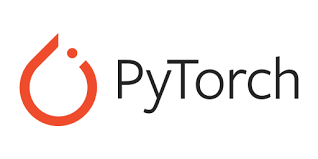

PyTorch is an open-source machine learning framework that is primarily used for developing and training deep learning models. It was developed by Facebook's AI Research Lab and released in 2016. PyTorch provides a flexible and dynamic approach to building neural networks, making it a popular choice among researchers and developers.

The framework is built on a dynamic computational graph concept, which means that the graph is built and modified on-the-fly as the program runs. This allows for more intuitive and flexible model development, as you can use standard Python control flow statements and debug the model easily.

PyTorch supports automatic differentiation, which enables efficient computation of gradients for training neural networks using backpropagation. It provides a rich set of tools and libraries for tasks such as data loading, model building, optimization, and evaluation.

One of the key advantages of PyTorch is its support for GPU acceleration, allowing you to train models on GPUs to significantly speed up computations. It also has a large and active community, which means there are plenty of resources, tutorials, and pre-trained models available.

PyTorch is often compared to TensorFlow, another popular deep learning framework. While TensorFlow focuses more on static computation graphs, PyTorch emphasizes dynamic computation graphs. This fundamental difference in design philosophy gives PyTorch an edge when it comes to flexibility and ease of use.

Overall, PyTorch is widely used in the research community and is gaining popularity in industry applications as well. It provides a powerful and user-friendly platform for building and training deep learning models.


## installation
installation instructions here: https://pytorch.org .

In [1]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder
# !pip install numpy torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Windows
# !pip install numpy torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# MacOS
# !pip install numpy torch torchvision torchaudio

### Let's import the torch module to get started.

In [ ]:
!pip install numpy torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
import torch   # in google collab this will run fine no need for installations

### Tensors
At its core, PyTorch is a library for processing tensors. A tensor is a number, vector, matrix, or any n-dimensional array. Let's create a tensor with a single number.

In [ ]:
# Number
t1 = torch.tensor(4.)
t1

4. is a shorthand for 4.0. It is used to indicate to Python (and PyTorch) that you want to create a floating-point number. We can verify this by checking the dtype attribute of our tensor.

In [ ]:
t1.dtype

### Let's try creating more complex tensors.

In [ ]:
# Vector
t2 = torch.tensor([1., 2, 3, 4])
t2

In [ ]:
# Matrix
t3 = torch.tensor([[5., 6], 
                   [7, 8], 
                   [9, 10]])
t3

In [ ]:
# 3-dimensional array
t4 = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])
t4

Tensors can have any number of dimensions and different lengths along each dimension. We can inspect the length along each dimension using the .shape property of a tensor.

In [ ]:
print(t1)
t1.shape

In [ ]:
print(t2)
t2.shape

In [ ]:
print(t3)
t3.shape

In [ ]:
print(t4)
t4.shape

Note that it's not possible to create tensors with an improper shape.

In [ ]:
# Matrix
t5 = torch.tensor([[5., 6, 11], 
                   [7, 8], 
                   [9, 10]])
t5

A ValueError is thrown because the lengths of the rows [5., 6, 11] and [7, 8] don't match.

### Tensor operations and gradients
We can combine tensors with the usual arithmetic operations. Let's look at an example:

In [ ]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)  # this should be declare in start
b = torch.tensor(5., requires_grad=True)  # I define it as a variable b with whom i like to differentiate the function
x, w, b

We've created three tensors: x, w, and b, all numbers. w and b have an additional parameter requires_grad set to True. We'll see what it does in just a moment.

Let's create a new tensor y by combining these tensors.

In [ ]:
# Arithmetic operations
y = w * x + b
y

As expected, y is a tensor with the value 3 * 4 + 5 = 17. What makes PyTorch unique is that we can automatically compute the derivative of y w.r.t. the tensors that have requires_grad set to True i.e. w and b. This feature of PyTorch is called autograd (automatic gradients).

To compute the derivatives, we can invoke the .backward method on our result y.

In [ ]:
# Compute derivatives
y.backward()  # it will create dy/dx, dy/dw, dy/dp

The derivatives of y with respect to the input tensors are stored in the .grad property of the respective tensors.

In [ ]:
# Display gradients
print('dy/dx:', x.grad) # it comes as non: because we didn't told our gradient to record
print('dy/dw:', w.grad) # dy/dw= x = 3 (requires_grad set to True.)
print('dy/db:', b.grad)

As expected, dy/dw has the same value as x, i.e., 3, and dy/db has the value 1. Note that x.grad is None because x doesn't have requires_grad set to True.

The "grad" in w.grad is short for gradient, which is another term for derivative. The term gradient is primarily used while dealing with vectors and matrices.

### Tensor functions
Apart from arithmetic operations, the torch module also contains many functions for creating and manipulating tensors. Let's look at some examples.

In [ ]:
# Create a tensor with a fixed value for every element
t6 = torch.full((3, 2), 42)  # each value of tensor will be filled by 42
t6

In [ ]:
# Concatenate two tensors with compatible shapes
t7 = torch.cat((t3, t6))
t7

In [ ]:
# Compute the sin of each element
t8 = torch.sin(t7)
t8

In [ ]:
# Change the shape of a tensor
t9 = t8.reshape(3, 2, 2)
t9

You can learn more about tensor operations here: https://pytorch.org/docs/stable/torch.html . Experiment with some more tensor functions and operations using the empty cells below.

### Interoperability with Numpy
Numpy is a popular open-source library used for mathematical and scientific computing in Python. It enables efficient operations on large multi-dimensional arrays and has a vast ecosystem of supporting libraries, including:

- Pandas for file I/O and data analysis
- Matplotlib for plotting and visualization
- OpenCV for image and video processing

Instead of reinventing the wheel, PyTorch interoperates well with Numpy to leverage its existing ecosystem of tools and libraries.

Here's how we create an array in Numpy:

In [ ]:
import numpy as np

x = np.array([[1, 2], [3, 4.]])
x

We can convert a Numpy array to a PyTorch tensor using torch.from_numpy.

In [ ]:
# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)
y

Let's verify that the numpy array and torch tensor have similar data types.

In [ ]:
x.dtype, y.dtype

We can convert a PyTorch tensor to a Numpy array using the .numpy method of a tensor.

In [ ]:
# Convert a torch tensor to a numpy array
z = y.numpy()
z

The interoperability between PyTorch and Numpy is essential because most datasets you'll work with will likely be read and preprocessed as Numpy arrays.

You might wonder why we need a library like PyTorch at all since Numpy already provides data structures and utilities for working with multi-dimensional numeric data. There are two main reasons:

1) Autograd: The ability to automatically compute gradients for tensor operations is essential for training deep learning models.
2) GPU support: While working with massive datasets and large models, PyTorch tensor operations can be performed efficiently using a Graphics Processing Unit (GPU). Computations that might typically take hours can be completed within minutes using GPUs.

### Linear-regression from scrach using pytorch

In [ ]:
import numpy as np
import torch

In [ ]:
#making training data 
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [ ]:
# Targets (apples, oranges)
target = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [ ]:
#Convert input and target to tensors
inputs = torch.from_numpy(inputs)  
target = torch.from_numpy(target)  

print(inputs,"\n")
print(target)

In [ ]:
# weights and biases
w = torch.randn(2,3 , requires_grad=True # one set: w1x1 + w2x2 + w3x3 + b1  other set: w4x1 + w5x2 + w6x3 + b2
# (2*3): one set of 3 weights is for apple and one set of 3 weights is for orange              
b = torch.randn(2, requires_grad=True)  # one set is used to predict the apple and other is to predict the oranges 

print(w)
print(b)

In [ ]:
#define the model

def model(x):
    return x @ w.t() + b  # 5*3 matrix multiplied by 3*2 because of transpose

In [ ]:
# prediction
preds = model(inputs)
print(preds)

In [ ]:
#actual
print(target)

In [ ]:
# loss function MSE
def MSE(actual, target):
    diff = actual - target
    return torch.sum(diff * diff) / diff.numel()

In [ ]:
# error
loss = MSE(target, preds)
print(loss)

In [ ]:
# compute gradients
loss.backward()

In [ ]:
print(w, "\n")
print(w.grad)

In [ ]:
print(b, "\n")
print(b.grad)

In [ ]:
#reset grad
w.grad.zero_()
b.grad.zero_()

print(w.grad)
print(b.grad)

In [ ]:
# adjust params

preds = model(inputs)
print(preds)

In [ ]:
# loss
loss = MSE(target, preds)
print(loss)

In [ ]:
loss.backward()

print(w.grad, "\n")
print(b.grad)

In [ ]:
# adjust weight & reset grad
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [ ]:
print(w)
print(b)

In [ ]:
# calculate again
preds = model(inputs)
loss = MSE(target, preds)
print(loss)

In [ ]:
# Training for multiple epochs
for i in range(400):
    preds = model(inputs)
    loss = MSE(target, preds)
    loss.backward()  # calculaet the gradient w.r.t all the loss ,weights and biases

    with torch.no_grad():
        w -= w.grad * 1e-5 # learning rate
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()
    print(f"Epochs({i}/{100}) & Loss {loss}")

In [ ]:
preds = model(inputs)
loss = MSE(target, preds)
print(loss)   # we have bring down our loss from 110880 to 68.155 and square root =8.2

In [ ]:
from math import sqrt
sqrt(loss)

In [ ]:
preds

In [ ]:
target  ## You can see they are almost close earch other

### Neural Network using Pytorch

In [ ]:
# To check GPU 
!nvidia-smi

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
type(training_data)

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    # print(X)
    # print(y)
    break

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

In [ ]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()  # we are not using cnn instead we are flatten array for input to out neural network
        self.linear_relu_stack = nn.Sequential(  # 784 neurons in input layer
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # telling model to be in training mode
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

In [ ]:
#save model
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

In [ ]:
#load model
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

In [ ]:
## Prediction

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')